# Preamble

The purpose of this seminar is to introduce everyone to data manipulation and visualization in Python

Goals from this seminar:
- Know how to read in data from an excel sheet to Python
- Understand how to create simple publication-quality visualizations

*Not* goals from this seminar:
- How to write programs in Python
- Discussion of data structures/algorithms

# Step 1 - Setting up environment and modules

We are currently running a [Jupyter-Lab notebook](https://jupyter.org). This is essentially a environment where one can run code in a browser. This is one way to run code, but it is not the only way! 

We are using this format because it allows interactive, immediate, and reproducible visualizations directly from the browser!

Most scripts in Python use the below format to import modules.

Q: What are modules?
<details>
  <summary>Click for answer!</summary>
A: Modules are bits of code that people can create and share with others. Rather than reinvent the wheel everytime, we can  leverage the hard work and skills of others to help us! 
</details>


Here we import 2 modules. [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) and [seaborn](https://seaborn.pydata.org/). Click on both links and read a bit about them to understand what they do.

In [1]:
import pandas as pd
import seaborn as sns

# Step 2 - Finding and understanding our data

For this seminar, we will begin by looking at some data that was collected for a [study](https://www.cgdev.org/sites/default/files/9267_file_CGDWP95_Feb_2007.pdf) in 2006 by Clemens and Pettersson. 
Here is the abstract:
> The migration of doctors and nurses from Africa to rich countries has raised fears of an African medical brain drain. But empirical research on the issue has been hampered by lack of data. How many doctors and nurses have left Africa? Which countries did they leave? Where have they settled? To answer these questions we have compiled a dataset of the cumulative bilateral net flows of African-born physicians and nurses to the nine most important destination countries. It is the first dataset of bilateral migration flows specific to a skilled profession collected systematically for a large number of developing countries. This note makes the data available to the research community. 

They were kind enough to provide an excel spreadsheet of their data! You can download a copy [here](https://www.cgdev.org/sites/default/files/archive/doc/Data/Africa_health_emigration.xls)

Open up the excel spreadsheet and look through it. Note the format, layout, and different fields. What types of questions would you want to ask and answer with this data?

# Step 3 - Reading in the data

Let's read it in! Luckily `pandas` has an in-built method to read in excel spreadsheets. You can find the instructions (documentation) for it [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

Scroll down and look at the examples they have. Think about how they work and see if you can understand the basics.

In [2]:
pd.read_excel(
    "./african-health-emigration_clemens-pettersson-2006.xls",
)

,PHYSICIANS born in African countries appearing in censuses of nine receiving countries circa 2000,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Center for Global Development, http://www.cgde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Michael Clemens and Gunilla Pettersson...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note that copyright to some of these data is r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Receiving country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad,Frac.**
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Africa,280808,15258,12813,23494,3715,2140,3859,1096,1107,1459,64941,0.19
60,Sub-Saharan,96405,13350,8558,4199,2800,1596,3847,173,696,1434,36653,0.28
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What do you notice about the data. How is it read in and what are the issues you see with it?

Let's try reading it in again, this time we'll specify a header row

In [3]:
doctor_data = pd.read_excel(
    "./african-health-emigration_clemens-pettersson-2006.xls",
    header=5,
)
doctor_data

,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad,Frac.**
0,Algeria,13639.0,45.0,50.0,10594.0,10.0,0.0,2.0,60.0,99.0,0,10860.0,0.44
1,Angola,881.0,16.0,0.0,5.0,25.0,0.0,2006.0,14.0,5.0,31,2102.0,0.70
2,Benin,405.0,0.0,4.0,206.0,0.0,0.0,0.0,1.0,13.0,0,224.0,0.36
3,Botswana,530.0,28.0,10.0,0.0,0.0,3.0,0.0,0.0,1.0,26,68.0,0.11
4,Burkina Faso,314.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,1.0,0,78.0,0.20
5,Burundi,230.0,5.0,0.0,53.0,10.0,3.0,0.0,1.0,55.0,9,136.0,0.37
6,Cameroon,1007.0,49.0,170.0,332.0,20.0,0.0,0.0,4.0,267.0,3,845.0,0.46
7,Cape Verde,202.0,0.0,15.0,10.0,0.0,0.0,186.0,0.0,0.0,0,211.0,0.51
8,Cent. Afr. Rep.,120.0,0.0,0.0,79.0,0.0,0.0,2.0,1.0,5.0,0,87.0,0.42
9,Chad,248.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,1.0,0,70.0,0.22


This looks better! Take a look at the `Total abroad` & `Frac.**` columns. How are they calculated? Also scroll to the bottom and see the rows past 53. How did the authors get these numbers?

*General rule of thumb* -- **Never** trust another person's calculations. You already have the raw data! Let's calculate these numbers ourselves. 

But first, let's get rid of the author's calculated areas.

In [4]:
doctor_data = pd.read_excel(
    "./african-health-emigration_clemens-pettersson-2006.xls",
    header=5,
    usecols=[
        "Sending country",
        "Domestic*",
        "UK",
        "USA",
        "France",
        "Canada",
        "Australia",
        "Portugal",
        "Spain",
        "Belgium",
        "So. Africa",
    ],
)
doctor_data = doctor_data.truncate(after=52)
doctor_data

,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa
0,Algeria,13639.0,45.0,50.0,10594.0,10.0,0.0,2.0,60.0,99.0,0
1,Angola,881.0,16.0,0.0,5.0,25.0,0.0,2006.0,14.0,5.0,31
2,Benin,405.0,0.0,4.0,206.0,0.0,0.0,0.0,1.0,13.0,0
3,Botswana,530.0,28.0,10.0,0.0,0.0,3.0,0.0,0.0,1.0,26
4,Burkina Faso,314.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,1.0,0
5,Burundi,230.0,5.0,0.0,53.0,10.0,3.0,0.0,1.0,55.0,9
6,Cameroon,1007.0,49.0,170.0,332.0,20.0,0.0,0.0,4.0,267.0,3
7,Cape Verde,202.0,0.0,15.0,10.0,0.0,0.0,186.0,0.0,0.0,0
8,Cent. Afr. Rep.,120.0,0.0,0.0,79.0,0.0,0.0,2.0,1.0,5.0,0
9,Chad,248.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,1.0,0


Nice! Now let's compute the `Total abroad` and `Fraction` columns.

How would we learn how to do this? *Look it up!*

Q: How would I create a new column `Total abroad` by adding `UK - So. Africa`?
<details>
  <summary>Click for answer!</summary>
A1: doctor_data['Total abroad'] = doctor_data['UK'] +
                                  doctor_data['USA'] +
                                  doctor_data['France'] +
                                  doctor_data['Canada'] +
                                  doctor_data['Australia'] +
                                  doctor_data['Portugal'] +
                                  doctor_data['Spain'] +
                                  doctor_data['Belgium'] +
                                  doctor_data['So. Africa']
A2: doctor_data['Total abroad'] = doctor_data[[
                                    'UK', 
                                    'USA', 
                                    'France', 
                                    'Canada', 
                                    'Australia', 
                                    'Portugal',
                                    'Spain',
                                    'Belgium',
                                    'So. Africa'
                                ]].sum(axis=1)
A3: doctor_data['Total abroad'] = doctor_data[
                                    doctor_data.columns[
                                        ~doctor_data.columns.isin(
                                            ['Sending country','Domestic*']
                                        )
                                    ]
                                  ].sum(axis=1)
</details>

In [5]:
doctor_data["Total abroad"] = doctor_data[
    [
        "UK",
        "USA",
        "France",
        "Canada",
        "Australia",
        "Portugal",
        "Spain",
        "Belgium",
        "So. Africa",
    ]
].sum(axis=1)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

!!! What is going on?? Read the error message and think about how you might resolve this issue?

A good place to start is to identify if this works on a smaller scale. Let's try making the sum just between French speaking countries

In [6]:
doctor_data["Total abroad"] = doctor_data[["France", "Belgium"]].sum(axis=1)
doctor_data[["Sending country", "France", "Belgium", "Total abroad"]]

,Sending country,France,Belgium,Total abroad
0,Algeria,10594.0,99.0,10693.0
1,Angola,5.0,5.0,10.0
2,Benin,206.0,13.0,219.0
3,Botswana,0.0,1.0,1.0
4,Burkina Faso,77.0,1.0,78.0
5,Burundi,53.0,55.0,108.0
6,Cameroon,332.0,267.0,599.0
7,Cape Verde,10.0,0.0,10.0
8,Cent. Afr. Rep.,79.0,5.0,84.0
9,Chad,69.0,1.0,70.0


This works! What if we add more countries...

In [7]:
doctor_data["Total abroad"] = doctor_data[["UK", "USA", "France", "Belgium"]].sum(
    axis=1
)
doctor_data[["Sending country", "UK", "USA", "France", "Belgium", "Total abroad"]]

,Sending country,UK,USA,France,Belgium,Total abroad
0,Algeria,45.0,50.0,10594.0,99.0,10788.0
1,Angola,16.0,0.0,5.0,5.0,26.0
2,Benin,0.0,4.0,206.0,13.0,223.0
3,Botswana,28.0,10.0,0.0,1.0,39.0
4,Burkina Faso,0.0,0.0,77.0,1.0,78.0
5,Burundi,5.0,0.0,53.0,55.0,113.0
6,Cameroon,49.0,170.0,332.0,267.0,818.0
7,Cape Verde,0.0,15.0,10.0,0.0,25.0
8,Cent. Afr. Rep.,0.0,0.0,79.0,5.0,84.0
9,Chad,0.0,0.0,69.0,1.0,70.0


This works! What if we add different countries...

In [8]:
doctor_data["Total abroad"] = doctor_data[
    ["Spain", "Portugal", "So. Africa", "France", "Belgium"]
].sum(axis=1)
doctor_data[
    [
        "Sending country",
        "Spain",
        "Portugal",
        "So. Africa",
        "France",
        "Belgium",
        "Total abroad",
    ]
]

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Aah, so this fails! When you narrow it down further you find the inclusion of `So. Africa` messes up the sum. Why might this be the case?

In [9]:
doctor_data[["Sending country", "So. Africa"]]

,Sending country,So. Africa
0,Algeria,0
1,Angola,31
2,Benin,0
3,Botswana,26
4,Burkina Faso,0
5,Burundi,9
6,Cameroon,3
7,Cape Verde,0
8,Cent. Afr. Rep.,0
9,Chad,0


Check out row 44, what is the value of that spot? It doesn't look like a number? Checking the excel file shows that they added a notation, but that's messing up the code. Let's replace that value with a number, and retry our sum code.

In [10]:
doctor_data.at[44, "So. Africa"] = -834
doctor_data["Total abroad"] = doctor_data[
    [
        "UK",
        "USA",
        "France",
        "Canada",
        "Australia",
        "Portugal",
        "Spain",
        "Belgium",
        "So. Africa",
    ]
].sum(axis=1)
doctor_data

,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad
0,Algeria,13639.0,45.0,50.0,10594.0,10.0,0.0,2.0,60.0,99.0,0,10860.0
1,Angola,881.0,16.0,0.0,5.0,25.0,0.0,2006.0,14.0,5.0,31,2102.0
2,Benin,405.0,0.0,4.0,206.0,0.0,0.0,0.0,1.0,13.0,0,224.0
3,Botswana,530.0,28.0,10.0,0.0,0.0,3.0,0.0,0.0,1.0,26,68.0
4,Burkina Faso,314.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,1.0,0,78.0
5,Burundi,230.0,5.0,0.0,53.0,10.0,3.0,0.0,1.0,55.0,9,136.0
6,Cameroon,1007.0,49.0,170.0,332.0,20.0,0.0,0.0,4.0,267.0,3,845.0
7,Cape Verde,202.0,0.0,15.0,10.0,0.0,0.0,186.0,0.0,0.0,0,211.0
8,Cent. Afr. Rep.,120.0,0.0,0.0,79.0,0.0,0.0,2.0,1.0,5.0,0,87.0
9,Chad,248.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,1.0,0,70.0


Lets now try to recompute the `Fraction` column... 

But wait, what data are we missing?

In [11]:
doctor_data["Total doctors"] = doctor_data[
    doctor_data.columns[~doctor_data.columns.isin(["Sending country", "Total abroad"])]
].sum(axis=1)
doctor_data

,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad,Total doctors
0,Algeria,13639.0,45.0,50.0,10594.0,10.0,0.0,2.0,60.0,99.0,0,10860.0,24499.0
1,Angola,881.0,16.0,0.0,5.0,25.0,0.0,2006.0,14.0,5.0,31,2102.0,2983.0
2,Benin,405.0,0.0,4.0,206.0,0.0,0.0,0.0,1.0,13.0,0,224.0,629.0
3,Botswana,530.0,28.0,10.0,0.0,0.0,3.0,0.0,0.0,1.0,26,68.0,598.0
4,Burkina Faso,314.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,1.0,0,78.0,392.0
5,Burundi,230.0,5.0,0.0,53.0,10.0,3.0,0.0,1.0,55.0,9,136.0,366.0
6,Cameroon,1007.0,49.0,170.0,332.0,20.0,0.0,0.0,4.0,267.0,3,845.0,1852.0
7,Cape Verde,202.0,0.0,15.0,10.0,0.0,0.0,186.0,0.0,0.0,0,211.0,413.0
8,Cent. Afr. Rep.,120.0,0.0,0.0,79.0,0.0,0.0,2.0,1.0,5.0,0,87.0,207.0
9,Chad,248.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,1.0,0,70.0,318.0


In [12]:
doctor_data["Fraction abroad"] = (
    doctor_data["Total abroad"] / doctor_data["Total doctors"]
)
doctor_data

,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad,Total doctors,Fraction abroad
0,Algeria,13639.0,45.0,50.0,10594.0,10.0,0.0,2.0,60.0,99.0,0,10860.0,24499.0,0.443283
1,Angola,881.0,16.0,0.0,5.0,25.0,0.0,2006.0,14.0,5.0,31,2102.0,2983.0,0.70466
2,Benin,405.0,0.0,4.0,206.0,0.0,0.0,0.0,1.0,13.0,0,224.0,629.0,0.356121
3,Botswana,530.0,28.0,10.0,0.0,0.0,3.0,0.0,0.0,1.0,26,68.0,598.0,0.113712
4,Burkina Faso,314.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,1.0,0,78.0,392.0,0.19898
5,Burundi,230.0,5.0,0.0,53.0,10.0,3.0,0.0,1.0,55.0,9,136.0,366.0,0.371585
6,Cameroon,1007.0,49.0,170.0,332.0,20.0,0.0,0.0,4.0,267.0,3,845.0,1852.0,0.456263
7,Cape Verde,202.0,0.0,15.0,10.0,0.0,0.0,186.0,0.0,0.0,0,211.0,413.0,0.510896
8,Cent. Afr. Rep.,120.0,0.0,0.0,79.0,0.0,0.0,2.0,1.0,5.0,0,87.0,207.0,0.42029
9,Chad,248.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,1.0,0,70.0,318.0,0.220126


Biratangaje! We now have everything we need to make some PLOTS

# Step 4 - Visualizing the data

Let's first try to recreate Figure 1 from their paper. They are using a bar plot to visualize the data, so let's [google how to make a bar plot in seaborn](https://letmegooglethat.com/?q=seaborn+bar+plot)

After carefully reading the documentation and looking at the examples, we land on something like this:

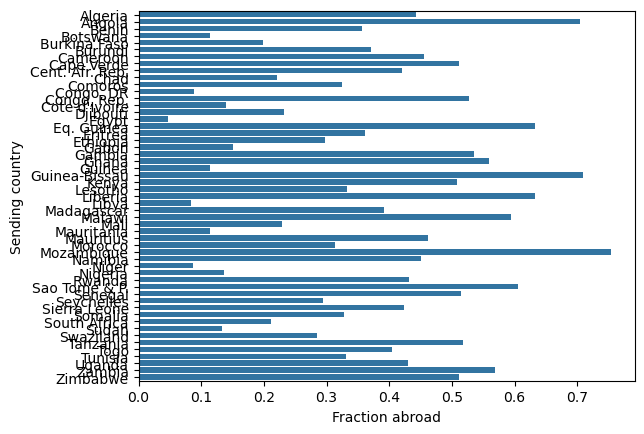

In [16]:
ax = sns.barplot(
    doctor_data,
    x="Fraction abroad",
    y="Sending country",
)

Looks a little goofy! How can we increase the size of the plot?

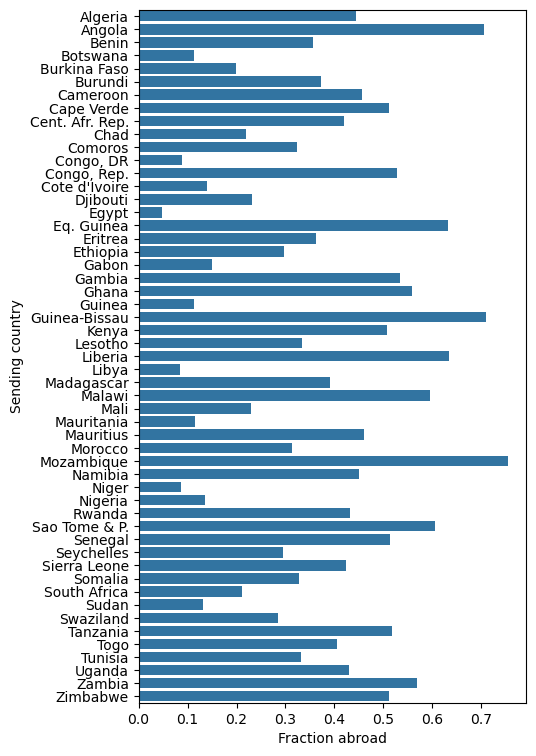

In [17]:
ax = sns.barplot(
    doctor_data,
    x="Fraction abroad",
    y="Sending country",
)
ax.figure.set_size_inches((5, 9))

Ooo, much better. Now let's [sort the values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) on the y-axis from highest fraction abroad to smallest

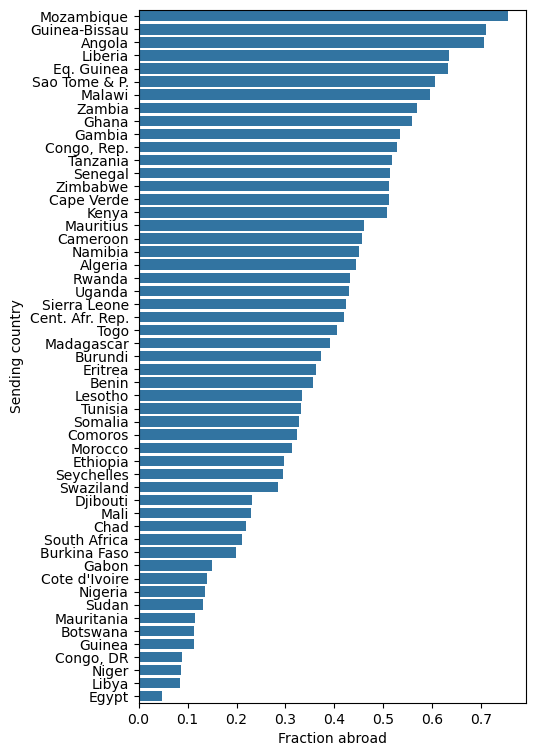

In [21]:
ax = sns.barplot(
    doctor_data.sort_values("Fraction abroad", ascending=False),
    x="Fraction abroad",
    y="Sending country",
)
ax.figure.set_size_inches((5, 9))

Looking good! Let's also change the x-axis to go from 0 - 1.

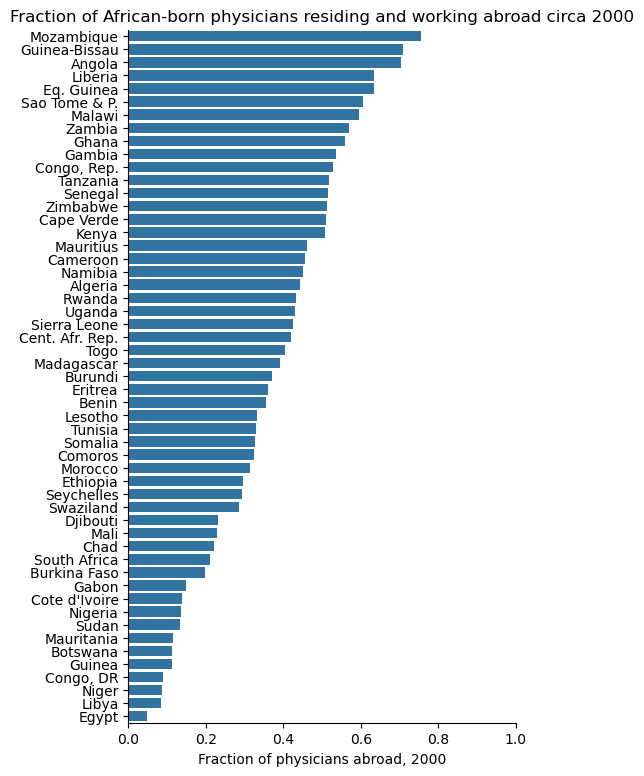

In [26]:
ax = sns.barplot(
    doctor_data.sort_values("Fraction abroad", ascending=False),
    x="Fraction abroad",
    y="Sending country",
)
ax.figure.set_size_inches((5, 9))
ax.set(
    xlim=(0, 1),
    title="Fraction of African-born physicians residing and working abroad circa 2000",
    xlabel="Fraction of physicians abroad, 2000",
    ylabel="",
)
sns.despine()

Congrats! We successfully remade the plot from the paper! 

But, what are some other questions we can answer with this data? 

# Step 5 - Break down some code

In [53]:
# What does the melt function do? How would you figure it out?
melted_doctor_data = pd.melt(
    doctor_data,
    id_vars=["Sending country", "Total doctors", "Total abroad"],
    value_vars=[
        "UK",
        "USA",
        "So. Africa",
        "France",
        "Belgium",
        "Spain",
        "Canada",
        "Portugal",
        "Australia",
    ],
    var_name="Receiving country",
    value_name="Number_going",
)

# What is going on here? What are the differences between 'Fraction_all_going' and 'Fraction_abroad_here'?
melted_doctor_data["Fraction_all_going"] = (
    melted_doctor_data["Number_going"] / melted_doctor_data["Total doctors"]
)
melted_doctor_data["Fraction_abroad_here"] = (
    melted_doctor_data["Number_going"] / melted_doctor_data["Total abroad"]
)

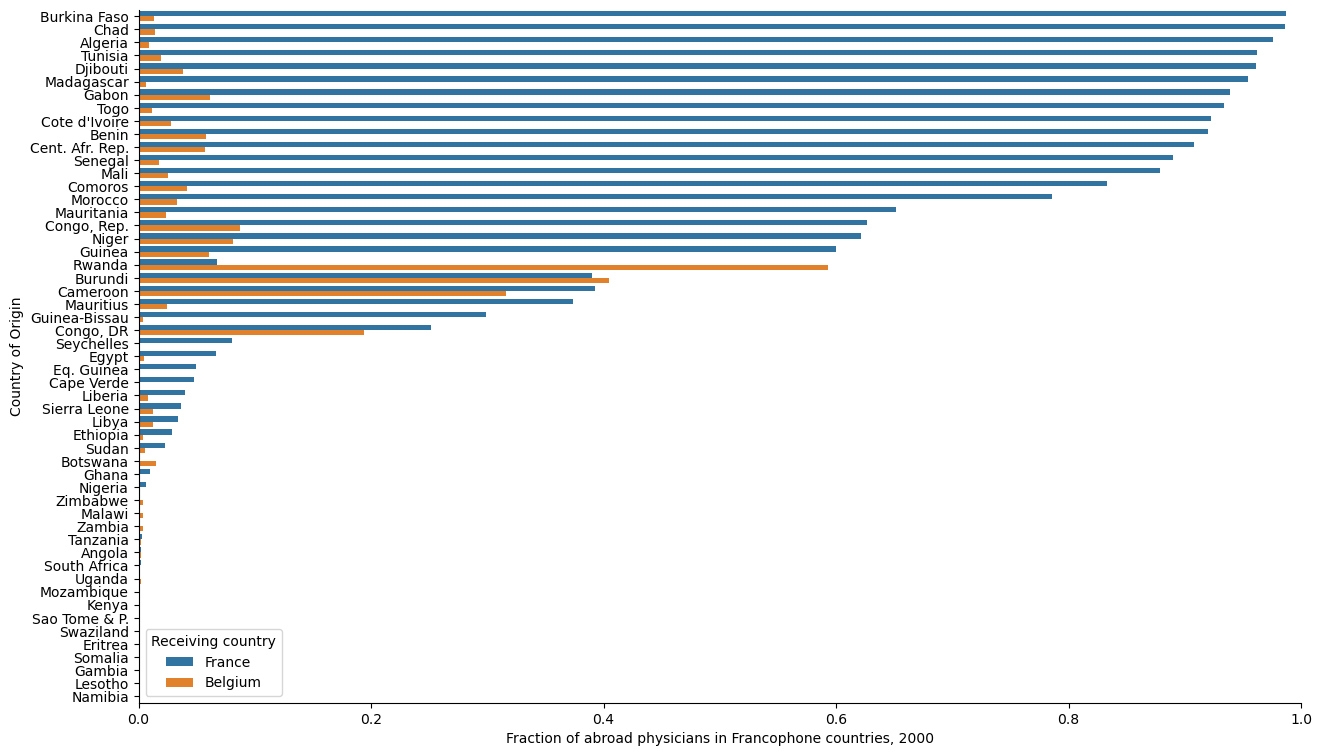

In [56]:
# What can you estimate from this plot? What are some features you immediately notice?
ax = sns.barplot(
    # what is the loc command? What does it do?
    melted_doctor_data.loc[
        melted_doctor_data["Receiving country"].isin(["France", "Belgium"])
    ].sort_values("Fraction_abroad_here", ascending=False),
    x="Fraction_abroad_here",
    y="Sending country",
    hue="Receiving country",
)
ax.figure.set_size_inches((15, 9))
ax.set(
    xlabel="Fraction of abroad physicians in Francophone countries, 2000",
    ylabel="Country of Origin",
    xlim=(0, 1),
)
sns.despine()

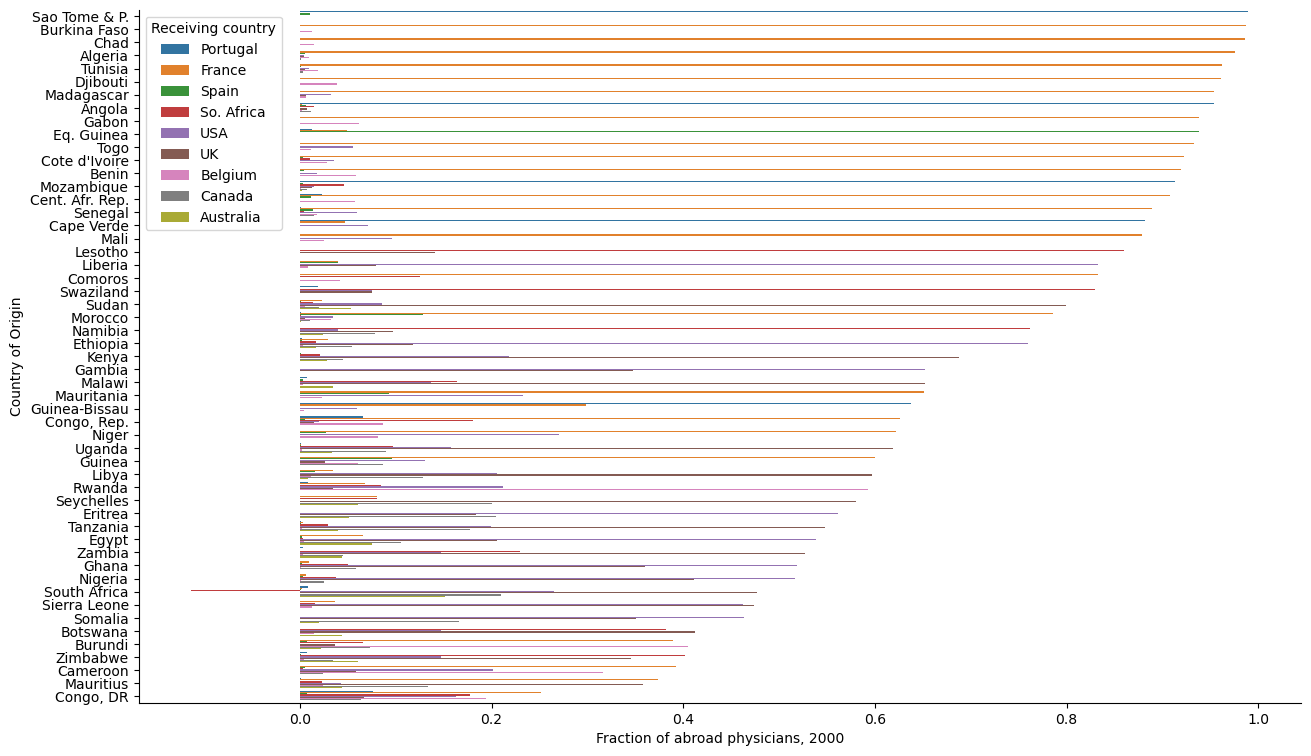

In [57]:
# What can you estimate from this plot? What are some features you immediately notice?
ax = sns.barplot(
    melted_doctor_data.sort_values("Fraction_abroad_here", ascending=False),
    x="Fraction_abroad_here",
    y="Sending country",
    hue="Receiving country",
)
ax.figure.set_size_inches((15, 9))
ax.set(
    xlabel="Fraction of abroad physicians, 2000",
    ylabel="Country of Origin",
    # what happens if I introduce the below commented code?
    # xlim=(0, 1),
)
sns.despine()

Let's drill down into *Rwanda*, I hear it's a pretty cool country 

How would we focus on the subset of data pertaining to Rwanda?

*Hint: Look at the above analysis and how we subset the data to only focus on Francophone receiving countries*

In [58]:
rwanda_doctor_data = melted_doctor_data.loc[
    melted_doctor_data["Sending country"] == "Rwanda"
]
rwanda_doctor_data

,Sending country,Total doctors,Total abroad,Receiving country,Number_going,Fraction_all_going,Fraction_abroad_here
38,Rwanda,273.0,118.0,UK,4.0,0.014652,0.033898
91,Rwanda,273.0,118.0,USA,25.0,0.091575,0.211864
144,Rwanda,273.0,118.0,So. Africa,10,0.03663,0.084746
197,Rwanda,273.0,118.0,France,8.0,0.029304,0.067797
250,Rwanda,273.0,118.0,Belgium,70.0,0.25641,0.59322
303,Rwanda,273.0,118.0,Spain,0.0,0.0,0.0
356,Rwanda,273.0,118.0,Canada,0.0,0.0,0.0
409,Rwanda,273.0,118.0,Portugal,1.0,0.003663,0.008475
462,Rwanda,273.0,118.0,Australia,0.0,0.0,0.0


Here's some code to get started. How would you make the plot better?

<Axes: xlabel='Fraction_all_going', ylabel='Receiving country'>

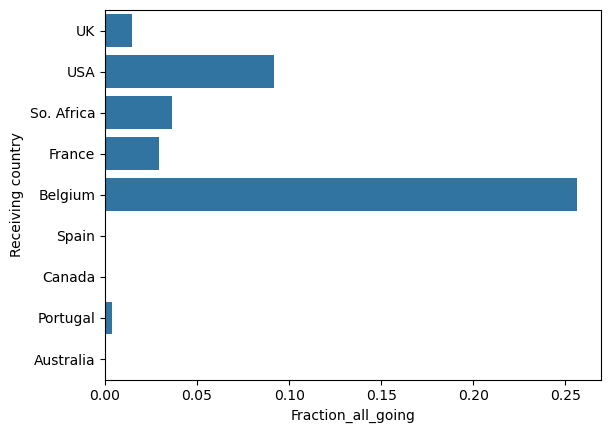

In [62]:
sns.barplot(rwanda_doctor_data, x="Fraction_all_going", y="Receiving country")

In [ ]:
# for you to tweak!
sns.barplot(rwanda_doctor_data, x="Fraction_all_going", y="Receiving country")

# Step 6 - Try on your own!

Now that we've gone through one example, let's try generating similar plots from the other dataset, Nurses!

I've added some code to get you started!

In [65]:
# hint: try adding header=5
nurse_data = pd.read_excel(
    "./african-health-emigration_clemens-pettersson-2006.xls",
    sheet_name="Nurses",
)
nurse_data

,PROFESSIONAL NURSES born in African countries appearing in censuses of nine receiving countries circa 2000,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Center for Global Development, http://www.cgde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Michael Clemens and Gunilla Pettersson...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note that copyright to some of these data is r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Receiving country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sending country,Domestic*,UK,USA,France,Canada,Australia,Portugal,Spain,Belgium,So. Africa,Total abroad,Frac.**
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Africa,758698,20647,20983,17421,1865,1828,2977,763,2872,239,69589,0.08
60,Sub-Saharan,414605,20372,19545,4297,1690,1724,2971,172,2294,239,53298,0.11
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 7 - Other data visualizations

Poke around the [Seaborn Examples](https://seaborn.pydata.org/examples/index.html) and try to imagine other creative ways to visualize the data.

In [105]:
pivot_data = melted_doctor_data.pivot(
    index="Receiving country",
    columns="Sending country",
    values="Fraction_abroad_here",
).astype('float64')
pivot_data

Sending country,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,Cent. Afr. Rep.,Chad,...,Somalia,South Africa,Sudan,Swaziland,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
Receiving country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000,0.000000,0.000000,0.044118,0.000000,0.022059,0.000000,0.000000,0.000000,0.000000,...,0.019868,0.150890,0.052770,0.000000,0.039823,0.000000,0.000000,0.033206,0.044168,0.060549
Belgium,0.009116,0.002379,0.058036,0.014706,0.012821,0.404412,0.315976,0.000000,0.057471,0.014286,...,0.000000,0.000000,0.005277,0.000000,0.002212,0.011111,0.018797,0.001633,0.003398,0.003745
Canada,0.000921,0.011893,0.000000,0.000000,0.000000,0.073529,0.023669,0.000000,0.000000,0.000000,...,0.165563,0.209833,0.019789,0.000000,0.176991,0.000000,0.003133,0.089820,0.045300,0.034332
France,0.975506,0.002379,0.919643,0.000000,0.987179,0.389706,0.392899,0.047393,0.908046,0.985714,...,0.000000,0.002173,0.022427,0.000000,0.002950,0.933333,0.962406,0.000544,0.000000,0.000000
Portugal,0.000184,0.954329,0.000000,0.000000,0.000000,0.000000,0.000000,0.881517,0.022989,0.000000,...,0.000000,0.008285,0.000000,0.018868,0.000737,0.000000,0.000000,0.000544,0.003398,0.007491
So. Africa,0.000000,0.014748,0.000000,0.382353,0.000000,0.066176,0.003550,0.000000,0.000000,0.000000,...,0.000000,-0.113269,0.013193,0.830189,0.029499,0.000000,0.000000,0.097441,0.229898,0.401373
Spain,0.005525,0.006660,0.004464,0.000000,0.000000,0.007353,0.004734,0.000000,0.011494,0.000000,...,0.000000,0.000679,0.001319,0.000000,0.000737,0.000000,0.001253,0.000544,0.000000,0.000624
UK,0.004144,0.007612,0.000000,0.411765,0.000000,0.036765,0.057988,0.000000,0.000000,0.000000,...,0.350993,0.476572,0.799472,0.075472,0.547935,0.000000,0.005013,0.618400,0.526614,0.345194
USA,0.004604,0.000000,0.017857,0.147059,0.000000,0.000000,0.201183,0.071090,0.000000,0.000000,...,0.463576,0.264838,0.085752,0.075472,0.199115,0.055556,0.009398,0.157866,0.147225,0.146692


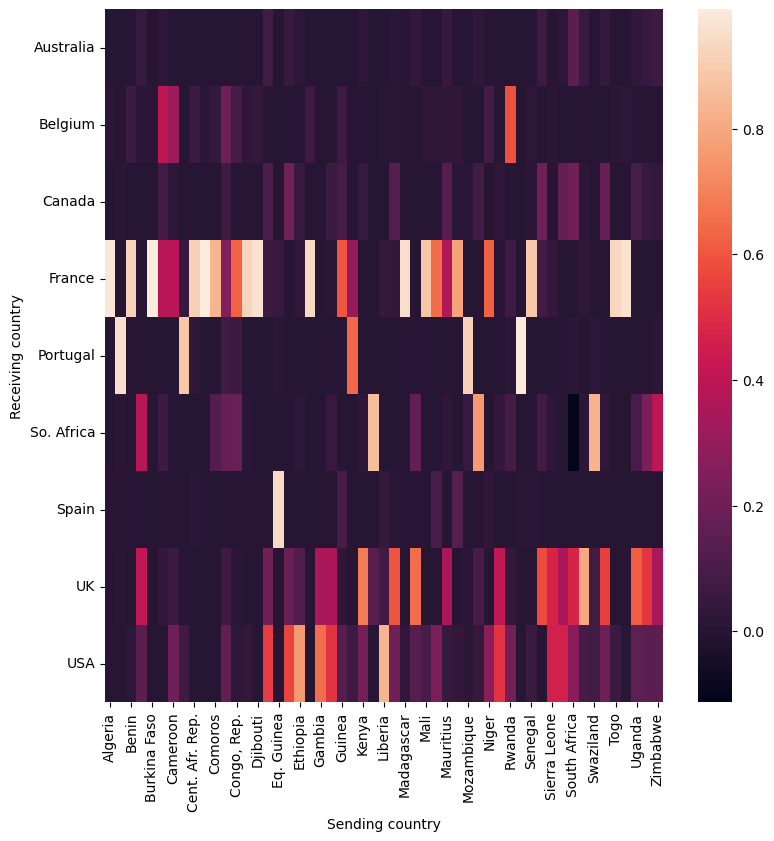

In [106]:
ax = sns.heatmap(pivot_data)
ax.figure.set_size_inches((9, 9))

Could I make these plots interactive? 
Yes! Check out [Plotly]() and [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)!